In [1253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.graph_objects as go
import os
import  pymysql
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [1254]:
qibao_csv='七宝_29.csv'
qibao_name = os.path.basename(qibao_csv).split('.',1)[0]

# 读取数据
# data = pd.read_csv('七宝分馆详细数据10.csv', encoding='gbk')
data = pd.read_csv(qibao_csv, encoding='gbk')
data.info()
data.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   operating_income     56 non-null     float64
 1   cal_date             56 non-null     int64  
 2   people_cost          56 non-null     float64
 3   site_cost            56 non-null     float64
 4   other_cost           56 non-null     float64
 5   headquarter_cost     56 non-null     float64
 6   operating_people     56 non-null     int64  
 7   sales_people         56 non-null     int64  
 8   average_performance  56 non-null     float64
 9   admission_student    56 non-null     int64  
 10  performance          56 non-null     float64
 11  income               56 non-null     float64
dtypes: float64(8), int64(4)
memory usage: 5.4 KB


,operating_income,cal_date,people_cost,site_cost,other_cost,headquarter_cost,operating_people,sales_people,average_performance,admission_student,performance,income
0,1124370.52,1,464835.27,155122.87,114511.0141,275347.5366,45,8,24986.0116,119,1235955.52,1292002.00
1,413256.00,2,371289.61,155114.95,54197.6411,158791.8372,42,7,9839.4286,39,427781.00,457201.00
2,1142782.00,3,549342.60,154638.84,86045.1705,195396.8608,45,7,25395.1556,98,1154737.24,1204361.00
3,843860.00,4,549247.54,154638.84,67370.3822,228943.9405,49,8,17221.6327,67,933174.60,934674.60
4,939986.00,5,484153.96,154638.84,53653.3950,232124.7572,46,8,20434.4783,71,996923.88,1026121.40
5,1434696.00,6,567841.58,154638.84,107303.4638,303839.3098,46,8,31189.0435,107,1487499.50,1611741.50
6,929517.00,7,567876.92,154638.84,69759.9312,277538.9562,46,8,20206.8913,115,1067184.00,1153311.00
7,848837.00,8,600212.88,158056.74,84264.6450,184749.1017,46,7,18452.9783,82,812278.40,984610.90
8,1067017.00,9,609120.25,158917.85,98273.6703,154603.3460,50,9,21340.3400,86,1143277.00,1169189.00
9,803257.50,10,488313.39,158832.09,125726.7378,210384.2029,46,8,17462.1196,72,893374.60,926249.60


                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     39.75
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           9.30e-19
Time:                        15:32:25   Log-Likelihood:                -761.87
No. Observations:                  56   AIC:                             1544.
Df Residuals:                      46   BIC:                             1564.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.966e+05   3

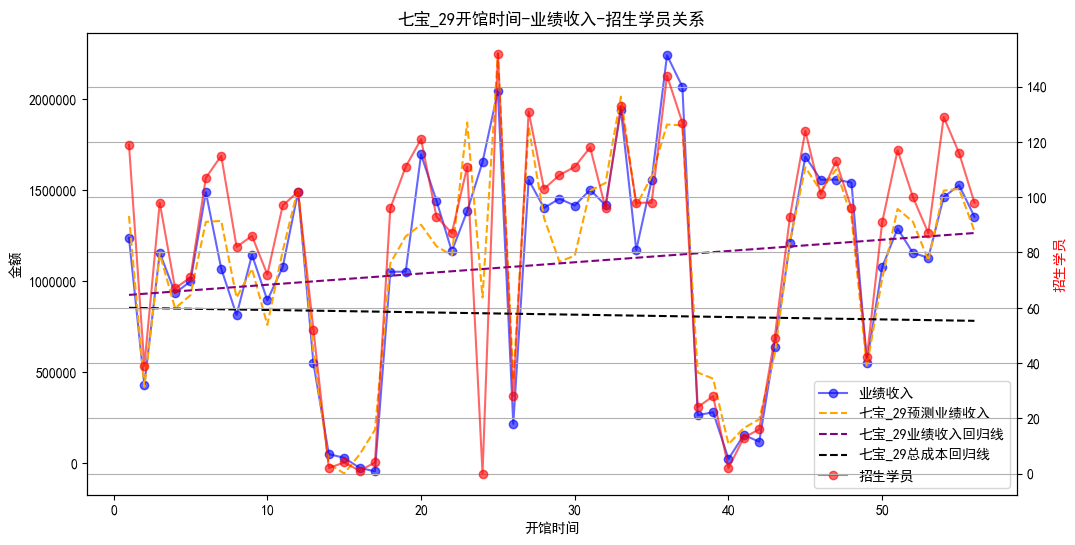

多元线性回归模型: 业绩收入 = -5287.29 * 开馆时间 + 9571.53 * 招生学员 + 0.25 * 人力成本 + -0.04 * 场地成本 + -1.56 * 其他成本 + 0.11 * 总部分摊成本 + 611.36 * 业绩人数 + 56916.18 * 销售人数 + 11.04 * 人均利润-496595.76
测试多元线性回归模型: 七宝_29预测业绩收入 = 104693.40元


In [1255]:
# 创建DataFrame
df = pd.DataFrame(data)
# 创建图形和坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制业绩收入和成本
ax1.plot(df['cal_date'], df['performance'], marker='o', alpha=0.6, label='业绩收入', color='blue')
# ax1.plot(df['cal_date'], data['headquarter_cost']+data['people_cost']+data['site_cost']+data['other_cost'], marker='o', alpha=0.6, label='总成本', color='green')

# 设置左边纵坐标标签
ax1.set_xlabel('开馆时间')
ax1.set_ylabel('金额', color='black')
ax1.get_yaxis().get_major_formatter().set_scientific(False)

# 绘制招生学员
ax2 = ax1.twinx()
ax2.plot(df['cal_date'], df['admission_student'], marker='o', alpha=0.6, label='招生学员', color='red')
ax2.set_ylabel('招生学员', color='red')
ax2.get_yaxis().get_major_formatter().set_scientific(False)

# 设置标题和图例
plt.title(f'{qibao_name}开馆时间-业绩收入-招生学员关系')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# 多元线性回归分析
X = df[['cal_date', 'admission_student', 'people_cost', 'site_cost', 'other_cost', 'headquarter_cost', 'operating_people', 'sales_people', 'average_performance']]
y = df['performance']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit() #todo mode
print(model.summary())

# 预测函数
def predicted_income(cal_date, admission_student, people_cost, site_cost, other_cost, headquarter_cost, operating_people, sales_people, average_performance):
    return (
        model.params[0] +
        model.params[1] * cal_date +
        model.params[2] * admission_student +
        model.params[3] * people_cost +
        model.params[4] * site_cost +
        model.params[5] * other_cost +
        model.params[6] * headquarter_cost +
        model.params[7] * operating_people +
        model.params[8] * sales_people +
        model.params[9] * average_performance
    )

# 生成时间范围
cal_date_range = np.linspace(min(df['cal_date']), max(df['cal_date']), 100)


predicted_incomes = [
    predicted_income(
        cal_date,
        admission_student,
        people_cost,
        site_cost,
        other_cost,
        headquarter_cost,
        operating_people,
        sales_people,
        average_performance
    ) 
    for cal_date, admission_student, people_cost, site_cost, other_cost, headquarter_cost, operating_people, sales_people, average_performance
    in zip(df['cal_date'], df['admission_student'], df['people_cost'], df['site_cost'], df['other_cost'], df['headquarter_cost'], df['operating_people'], df['sales_people'], df['average_performance'])
]

# 绘制预测线
ax1.plot(df['cal_date'], predicted_incomes, color='orange', linestyle='--', label=f'{qibao_name}预测业绩收入')

# 添加回归线
X = df['cal_date']
y = df['performance']
z = df['headquarter_cost']+df['people_cost']+df['site_cost']+df['other_cost']
coefficients = np.polyfit(X, y, 1)
coefficients1 = np.polyfit(X, z, 1)
operation = np.poly1d(coefficients)
total_cost = np.poly1d(coefficients1)

# 绘制回归线并共享左侧坐标轴
ax1.plot(df['cal_date'], operation(X), color='purple', linestyle='--', label=f'{qibao_name}业绩收入回归线')
ax1.plot(df['cal_date'], total_cost(X), color='black', linestyle='--', label=f'{qibao_name}总成本回归线')

# 设置图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='lower right')

plt.grid(True)
plt.show()

print(f'多元线性回归模型: 业绩收入 = {model.params[1]:.2f} * 开馆时间 + {model.params[2]:.2f} * 招生学员 + {model.params[3]:.2f} * 人力成本 + {model.params[4]:.2f} * 场地成本 + {model.params[5]:.2f} * 其他成本 + {model.params[6]:.2f} * 总部分摊成本 + {model.params[7]:.2f} * 业绩人数 + {model.params[8]:.2f} * 销售人数 + {model.params[9]:.2f} * 人均利润{model.params[0]:.2f}')

# 测试模型
开馆时间 = 1
人力成本 = 181908.51
场地成本 = 185071.57
其他成本 = 13166.0084
总部分摊成本 = 17970.0569
业绩人数 = 30
销售人数 = 5
人均利润 = 17970.0569
招生学员 = 9
sample = (开馆时间, 招生学员, 人力成本, 场地成本, 其他成本, 总部分摊成本, 业绩人数, 销售人数, 人均利润)
predicted_income = predicted_income(*sample)

print(f'测试多元线性回归模型: {qibao_name}预测业绩收入 = {predicted_income:.2f}元')


                            OLS Regression Results                            
Dep. Variable:      admission_student   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.3780
Date:                Fri, 03 Nov 2023   Prob (F-statistic):              0.769
Time:                        15:32:25   Log-Likelihood:                -288.05
No. Observations:                  56   AIC:                             584.1
Df Residuals:                      52   BIC:                             592.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               42.6706     60.466  

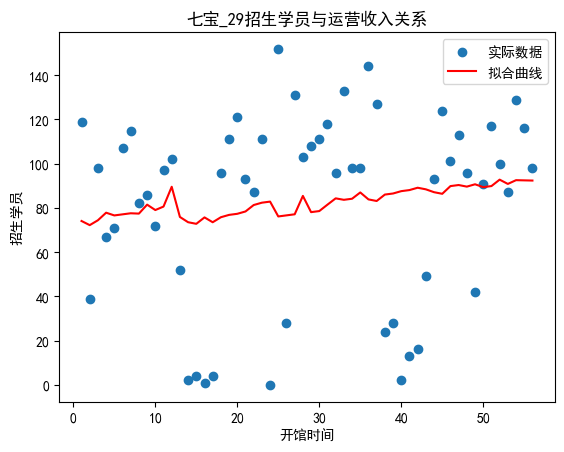

In [1256]:
# 选择自变量和因变量
X = data[['cal_date', 'operating_people','sales_people']]  # 开馆时间和销售人数作为自变量
y = data['admission_student']  # 招生学员作为因变量

# 添加截距项
X = sm.add_constant(X)

# 拟合多元线性回归模型
model2 = sm.OLS(y, X).fit() # todo model2 招生学员与运营收入关系
print(model2.summary())
# 提取模型参数
intercept = model2.params['const']
slope_cal_date = model2.params['cal_date']
slope_sales_people = model2.params['sales_people']
slope_operating_people = model2.params['operating_people']

# 打印函数方程
print(f'招生学员 = {intercept:.2f} + {slope_cal_date:.2f} * 开馆时间 + {slope_sales_people:.2f} * 销售人数+{slope_operating_people:.2f} * 运营人数')

# 绘制拟合曲线
plt.scatter(data['cal_date'], data['admission_student'], label='实际数据')
predicted_values = intercept + slope_cal_date * data['cal_date'] + slope_sales_people * data['sales_people']+slope_operating_people*data['operating_people']
plt.plot(data['cal_date'], predicted_values, color='red', label='拟合曲线')
plt.title(f'{qibao_name}招生学员与运营收入关系')
plt.xlabel('开馆时间')
plt.ylabel('招生学员')
plt.legend()
plt.show()

运营收入 =7368.87 *招生学员 +162624.09


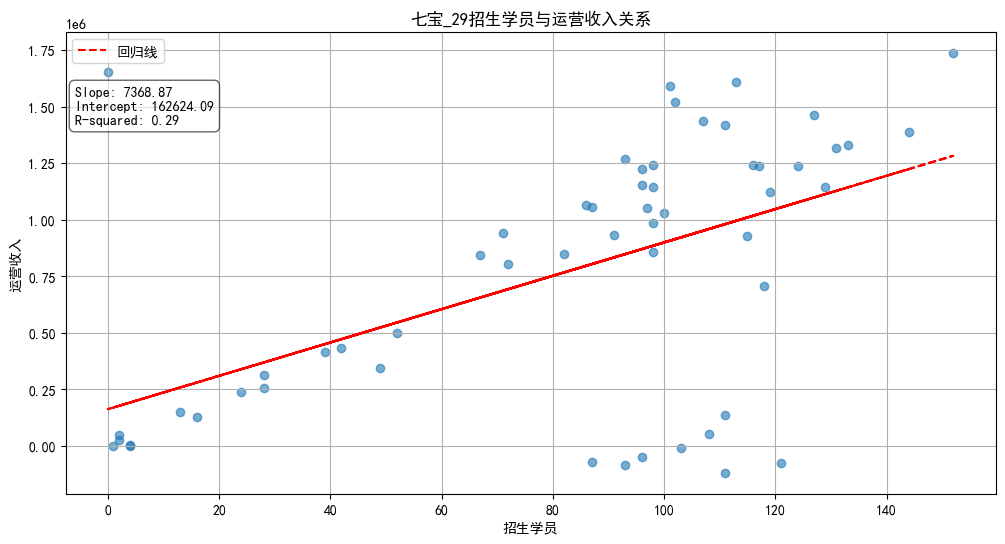

In [1257]:
# 可视化数据分布并添加回归线
plt.figure(figsize=(12, 6))
plt.scatter(data['admission_student'], data['operating_income'], marker='o', alpha=0.6)
plt.title(f'{qibao_name}招生学员与运营收入关系')
plt.xlabel('招生学员')
plt.ylabel('运营收入')
plt.grid(True)

# 添加回归线
X = data['admission_student']
y = data['operating_income']
coefficients = np.polyfit(X, y, 1)
poly = np.poly1d(coefficients)
plt.plot(X, poly(X), color='red', linestyle='--', label='回归线')

# 显示模型数据
model1 = sm.OLS(y, sm.add_constant(X)).fit() # todo model1 招生学员与运营收入关系
plt.text(0.01, 0.8, f'Slope: {model1.params[1]:.2f}\nIntercept: {model1.params[0]:.2f}\nR-squared: {model1.rsquared:.2f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.6))
print(f'运营收入 ={model1.params[1]:.2f} *招生学员 +{model1.params[0]:.2f}')
plt.legend()
plt.show()


                             OLS Regression Results                            
Dep. Variable:     average_performance   R-squared:                       0.309
Model:                             OLS   Adj. R-squared:                  0.296
Method:                  Least Squares   F-statistic:                     24.17
Date:                 Fri, 03 Nov 2023   Prob (F-statistic):           8.62e-06
Time:                         15:32:26   Log-Likelihood:                -620.15
No. Observations:                   56   AIC:                             1244.
Df Residuals:                       54   BIC:                             1248.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2776.3295

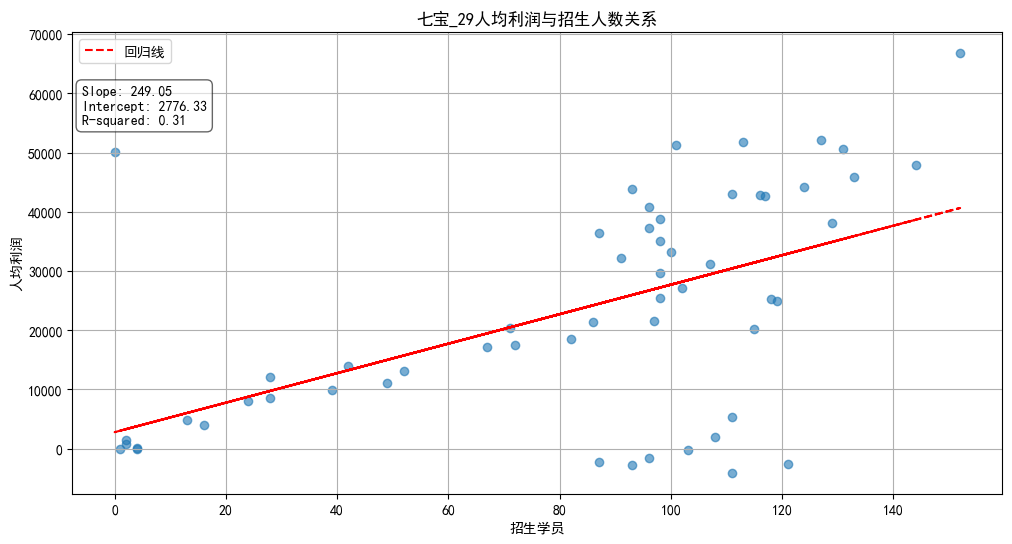

In [1258]:
# 可视化数据分布并添加回归线
plt.figure(figsize=(12, 6))
plt.scatter(data['admission_student'], data['average_performance'], marker='o', alpha=0.6)
plt.title(f'{qibao_name}人均利润与招生人数关系')
plt.xlabel('招生学员')
plt.ylabel('人均利润')
plt.grid(True)

# 添加回归线
X = data['admission_student']
y = data['average_performance']
coefficients = np.polyfit(X, y, 1)
poly = np.poly1d(coefficients)
plt.plot(X, poly(X), color='red', linestyle='--', label='回归线')

# 显示模型数据
model3 = sm.OLS(y, sm.add_constant(X)).fit() # todo model3 人均利润与招生人数关系
print(model3.summary())
plt.text(0.01, 0.8, f'Slope: {model3.params[1]:.2f}\nIntercept: {model3.params[0]:.2f}\nR-squared: {model3.rsquared:.2f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.6))
print(f'运营收入 ={model3.params[1]:.2f} *招生学员 +{model3.params[0]:.2f}')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:            people_cost   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2.906
Date:                Fri, 03 Nov 2023   Prob (F-statistic):             0.0433
Time:                        15:32:26   Log-Likelihood:                -753.51
No. Observations:                  56   AIC:                             1515.
Df Residuals:                      52   BIC:                             1523.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.187e+05   2.46e+05  

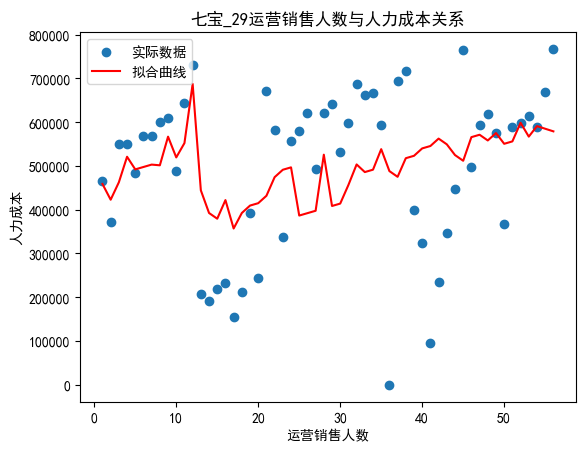

In [1259]:
# 选择自变量和因变量
X = data[['cal_date', 'operating_people','sales_people']]  # 开馆时间和运营人数和销售人数作为自变量
y = data['people_cost'] 

# 添加截距项
X = sm.add_constant(X)

# 拟合多元线性回归模型
model10 = sm.OLS(y, X).fit()
print(model10.summary())
# 提取模型参数
intercept = model10.params['const'] # TODO model10 运营销售人数与人力成本关系
slope_cal_date = model10.params['cal_date']
slope_sales_people = model10.params['sales_people']
slope_operating_people = model10.params['operating_people']

# 打印函数方程
print(f'人力成本 = {intercept:.2f} + {slope_cal_date:.2f} * 开馆时间 + {slope_sales_people:.2f} * 销售人数+{slope_operating_people:.2f} * 运营人数')

# 绘制拟合曲线
plt.scatter(data['cal_date'], data['people_cost'], label='实际数据')
predicted_values = intercept + slope_cal_date * data['cal_date'] + slope_sales_people * data['sales_people']+slope_operating_people*data['operating_people']
plt.plot(data['cal_date'], predicted_values, color='red', label='拟合曲线')
plt.title(f'{qibao_name}运营销售人数与人力成本关系')
plt.xlabel('运营销售人数')
plt.ylabel('人力成本')
plt.legend()
plt.show()

                             OLS Regression Results                            
Dep. Variable:     average_performance   R-squared:                       0.402
Model:                             OLS   Adj. R-squared:                  0.379
Method:                  Least Squares   F-statistic:                     17.81
Date:                 Fri, 03 Nov 2023   Prob (F-statistic):           1.21e-06
Time:                         15:32:26   Log-Likelihood:                -616.11
No. Observations:                   56   AIC:                             1238.
Df Residuals:                       53   BIC:                             1244.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5951.4195

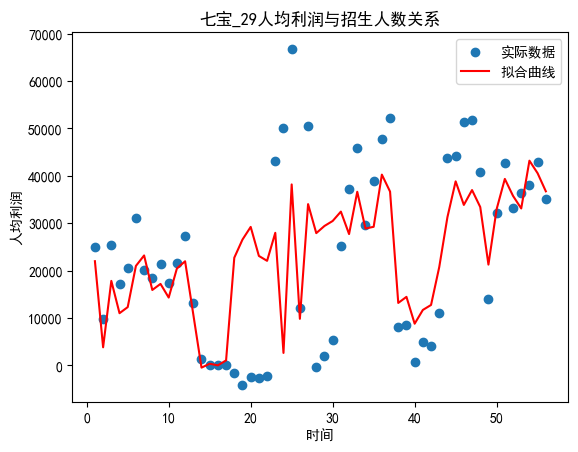

In [1260]:
# 选择自变量和因变量
X = data[['cal_date', 'admission_student']]  # 开馆时间和运营人数和销售人数作为自变量
y = data['average_performance'] 

# 添加截距项
X = sm.add_constant(X)

# 拟合多元线性回归模型
model11 = sm.OLS(y, X).fit() #todo model11 人均利润与招生人数关系
print(model11.summary())
# 提取模型参数
intercept = model11.params['const']
slope_cal_date = model11.params['cal_date']
slope_student = model11.params['admission_student']

# 打印函数方程
print(f'人力成本 = {intercept:.2f} + {slope_cal_date:.2f} * 开馆时间 + {slope_student:.2f} * 招生人数')

# 绘制拟合曲线
plt.scatter(data['cal_date'], data['average_performance'], label='实际数据')
predicted_values = intercept + slope_cal_date * data['cal_date'] + slope_student * data['admission_student']
plt.plot(data['cal_date'], predicted_values, color='red', label='拟合曲线')
plt.title(f'{qibao_name}人均利润与招生人数关系')
plt.xlabel('时间')
plt.ylabel('人均利润')
plt.legend()
plt.show()

In [1261]:
#--TODO 1.获取高新的数据，然后将平均值获取到50个月，最后使用七宝的运营收入和招生人数的函数和模型来预测高新的收入和人数

# 8月数据
# csv_file_path = '七宝_29.csv'
# csv_file_path = '辛庄_50.csv'
# csv_file_path = '南方_35.csv'
# csv_file_path = '中环_31.csv'
# csv_file_path = '世纪_30.csv'
# 9月数据
# csv_file_path = '10月七宝_29.csv'
# csv_file_path = '10月辛庄_50.csv'
# csv_file_path = '10月南方_35.csv'
# csv_file_path = '10月中环_31.csv'
# csv_file_path = '10月世纪_30.csv'
# 其他
csv_file_path = '9.csv'
# csv_file_path = '9大宁39.csv'
# csv_file_path = '9静安大悦城94.csv'
# csv_file_path = '9漕宝日月光49.csv'
# csv_file_path = '9梅林87.csv'
# csv_file_path = '9广安门201.csv'
# csv_file_path = '9古美37.csv'
# csv_file_path = '9国泰128.csv'
# csv_file_path = '9萧山万象汇212.csv'
# 提取文件名
file_name = os.path.basename(csv_file_path).split('.',1)[0]
# 新数据
# new_data = pd.read_csv(csv_file_path)
# new_data.head(100)

In [1262]:
host, user, passwd, db = ('ht-polardb.rwlb.rds.aliyuncs.com',
                                  'user_bi',
                                  'H^4zzM8iVc&c',
                                  'dw_bi')
conn = pymysql.connect(user=user, host=host, port=3306, passwd=passwd, db=db, charset='utf8')
cursor = conn.cursor()


sql_query = """
select a.*, b.performance, b.income
from (select distinct operating_income
                    , substring(cal_date, 1, 7) as cal_date
                    , people_cost
                    , site_cost
                    , other_cost
                    , headquarter_cost
                    , operating_people
                    , sales_people
                    , average_performance
                    , admission_student
      from business_analysis.ba_average_profits
      where store_id = '65'
      group by substring(cal_date, 1, 7)) a
         left join (select zr_month  as cal_date,
                           ifnull(sum(case when operation_type <> -1 and staff_id >= 0 then bcs_score else 0 end), 0) -
                           ifnull(sum(case when operation_type = -1 and staff_id >= -1 then bcs_score else 0 end),
                                  0) as performance,
                           ifnull(sum(case when operation_type <> -1 and staff_id >= 0 then bcs_score else 0 end),
                                  0) as income
                    from dw_bi.rp_dw_contract_sales
                    where 1 = 1
                      and store_id = '65'
                      AND staff_id in (0, -1)
                      and tenant_id = 1
                    GROUP by zr_month) b
                   on a.cal_date = b.cal_date
"""
#-- todo
new_data = pd.read_sql_query(sql_query, conn)
new_data['cal_date'] =  range(1, len(new_data) + 1)
new_data.head(100)
conn.close()

C:\Users\HH\AppData\Local\Temp\ipykernel_275104\484419499.py:39: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     39.75
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           9.30e-19
Time:                        15:32:26   Log-Likelihood:                -761.87
No. Observations:                  56   AIC:                             1544.
Df Residuals:                      46   BIC:                             1564.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.966e+05   3

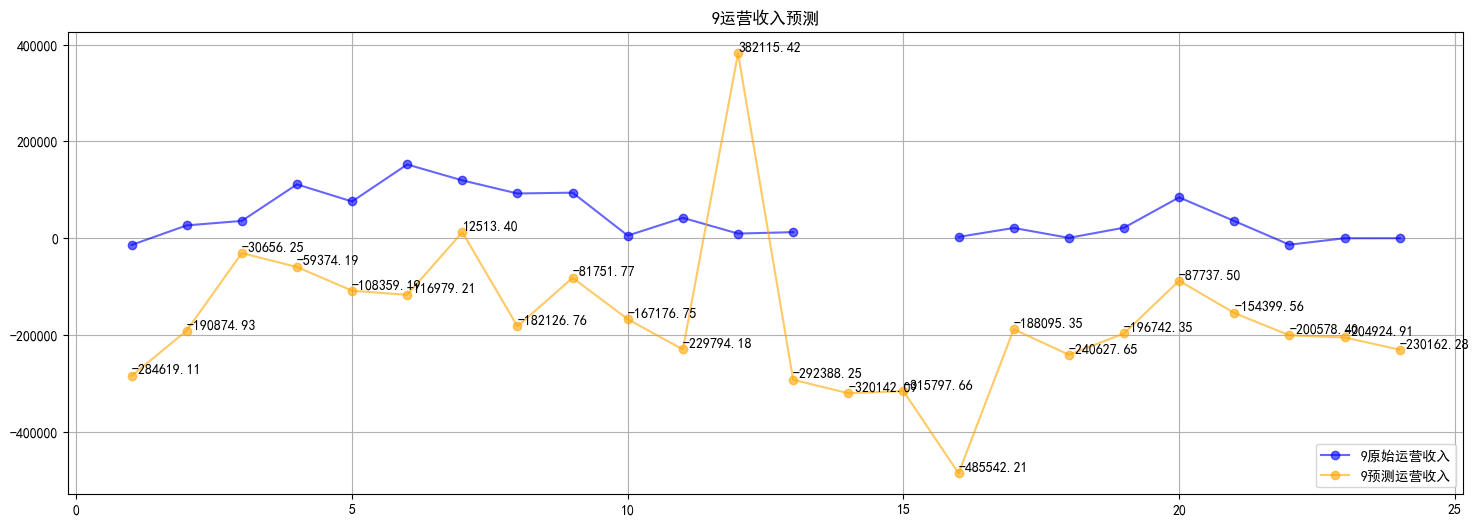

In [1263]:
print(model.summary())
def predicted_income1(cal_date, admission_student, people_cost, site_cost, other_cost, headquarter_cost, operating_people, sales_people, average_performance):
    return (
        model.params[0] +
        model.params[1] * cal_date +
        model.params[2] * admission_student +
        model.params[3] * people_cost +
        model.params[4] * site_cost +
        model.params[5] * other_cost +
        model.params[6] * headquarter_cost +
        model.params[7] * operating_people +
        model.params[8] * sales_people +
        model.params[9] * average_performance
    )

# 预测运营收入
predicted_incomes_new = [
    predicted_income1(
        row['cal_date'],
        row['admission_student'],
        row['people_cost'],
        row['site_cost'],
        row['other_cost'],
        row['headquarter_cost'],
        row['operating_people'],
        row['sales_people'],
        row['average_performance']
    )
    for index, row in new_data.iterrows()
]

# 创建一个新的图形
plt.figure(figsize=(18, 6))

# 绘制原始数据
plt.plot(new_data['cal_date'], new_data['performance'], marker='o', alpha=0.6, label=f'{file_name}原始运营收入', color='blue')

# 绘制预测数据
plt.plot(new_data['cal_date'], predicted_incomes_new, marker='o', alpha=0.6, label=f'{file_name}预测运营收入', color='orange')

# 在每个数据点旁边显示具体数值
for i, value in enumerate(predicted_incomes_new):
    plt.text(new_data['cal_date'].iloc[i], value, f'{value:.2f}', ha='left', va='bottom')

# 设置图例和标题，并将图例放在右下角
plt.legend(loc='lower right')
plt.title(f'{file_name}运营收入预测')

# 关闭科学计数法
plt.ticklabel_format(style='plain')

# 显示图表
plt.grid(True)
plt.show()


                             OLS Regression Results                            
Dep. Variable:     average_performance   R-squared:                       0.309
Model:                             OLS   Adj. R-squared:                  0.296
Method:                  Least Squares   F-statistic:                     24.17
Date:                 Fri, 03 Nov 2023   Prob (F-statistic):           8.62e-06
Time:                         15:32:27   Log-Likelihood:                -620.15
No. Observations:                   56   AIC:                             1244.
Df Residuals:                       54   BIC:                             1248.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2776.3295

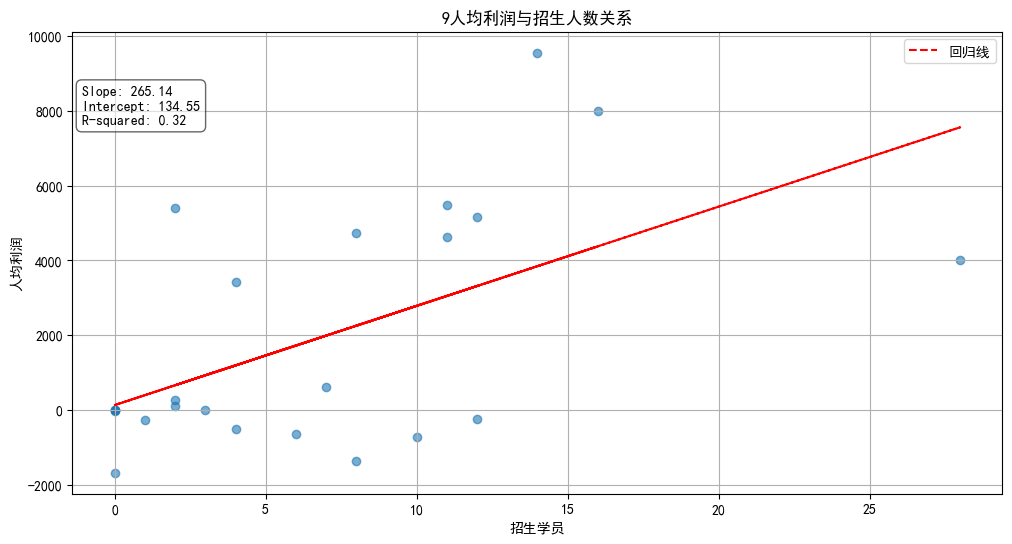

In [1264]:
# 自己分馆的人均利润与招生人数关系
plt.figure(figsize=(12, 6))
plt.scatter(new_data['admission_student'], new_data['average_performance'], marker='o', alpha=0.6)
plt.title(f'{file_name}人均利润与招生人数关系')
plt.xlabel('招生学员')
plt.ylabel('人均利润')
plt.grid(True)

# 添加回归线
X = new_data['admission_student']
y = new_data['average_performance']
coefficients = np.polyfit(X, y, 1)
poly = np.poly1d(coefficients)
plt.plot(X, poly(X), color='red', linestyle='--', label='回归线')

# 显示模型数据
model4 = sm.OLS(y, sm.add_constant(X)).fit()
print(model3.summary())
plt.text(0.01, 0.8, f'Slope: {model4.params[1]:.2f}\nIntercept: {model4.params[0]:.2f}\nR-squared: {model4.rsquared:.2f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.6))
print(f'运营收入 ={model4.params[1]:.2f} *招生学员 +{model4.params[0]:.2f}')
plt.legend()
plt.show()


In [1265]:
# 获取当前数据表的最大cal_date值
max_cal_date = new_data['cal_date'].max()

# 计算需要添加的行数
ds = 2
num_rows_to_add = max_cal_date + ds

# 计算需要填充的平均值（接下来的12个月的平均值）
new_rows = []
for i in range(max_cal_date + 1, max_cal_date + ds + 1):
    last_12_months_data = new_data.tail(12)
    last_1_months_data = new_data.tail(12)
    avg_people_cost = last_12_months_data['people_cost'].mean()
    avg_site_cost = last_12_months_data['site_cost'].mean()
    avg_other_cost = last_12_months_data['other_cost'].mean()
    avg_headquarter_cost = last_12_months_data['headquarter_cost'].mean()
    avg_operating_people = last_12_months_data['operating_people'].mean()
    avg_sales_people = last_12_months_data['sales_people'].mean()
    avg_average_performance = last_12_months_data['average_performance'].mean()
    admission_student = last_1_months_data['admission_student'].mean()

    new_row = {
        'cal_date': i,
        'people_cost': model10.predict([1, i, avg_operating_people, avg_sales_people])[0],
        # 'people_cost': avg_people_cost,
        'site_cost': avg_site_cost,
        'other_cost': avg_other_cost,
        'headquarter_cost': avg_headquarter_cost,
        'operating_people': avg_operating_people,
        'sales_people': avg_sales_people,
        'average_performance': model3.predict([1, admission_student])[0],#todo 切换模型
        # 'average_performance': 40494.935,
        'admission_student': model2.predict([1, i, avg_operating_people, avg_sales_people])[0],
        # 'admission_student': admission_student,
    }
    new_rows.append(new_row)
    # new_data = pd.concat([new_data, pd.DataFrame(new_rows)], ignore_index=True)

    # 只保留最新的行，去掉之前添加的行
    new_data = pd.concat([new_data.head(max_cal_date),new_data.tail(0), pd.DataFrame(new_rows)], ignore_index=True)
    ds += 1

# 打印处理后的数据，仅包含最新的行
new_data.head(100)

# 预测高新的运营收入
new_data['predicted_income'] = new_data.apply(
    lambda row: predicted_income1(
        row['cal_date'],
        row['admission_student'],
        row['people_cost'],
        row['site_cost'],
        row['other_cost'],
        row['headquarter_cost'],
        row['operating_people'],
        row['sales_people'],
        row['average_performance']
    ),
    axis=1
)

# 打印前100行处理后的数据
new_data.head(100).round(3)#todo 预测数据

,operating_income,cal_date,people_cost,site_cost,other_cost,headquarter_cost,operating_people,sales_people,average_performance,admission_student,performance,income,predicted_income
0,-6075.7,1,56642.410,37817.720,3915.440,0.000,12.000,3.000,-506.308,4.000,-13895.7,6890.0,-284619.110
1,27060.0,2,46283.760,37817.720,2822.462,10397.688,5.000,4.000,5412.000,2.000,26548.0,30060.0,-190874.933
2,56268.0,3,53996.700,37817.810,14657.873,9620.899,14.000,3.000,4019.143,28.000,35820.0,35820.0,-30656.248
3,64781.0,4,60422.140,37817.720,4181.758,17575.448,14.000,5.000,4627.214,11.000,111316.0,111816.0,-59374.190
4,82568.0,5,53511.720,37817.720,5491.544,20389.747,16.000,4.000,5160.500,12.000,75918.0,75918.0,-108359.187
5,143190.0,6,67798.340,40421.720,53566.445,30324.717,15.000,4.000,9546.000,14.000,152397.0,155848.0,-116979.206
6,127747.0,7,63617.020,38251.730,5046.004,38143.217,16.000,5.000,7984.188,16.000,119540.0,133720.0,12513.400
7,75780.0,8,64408.360,38251.720,16564.408,16493.493,16.000,4.000,4736.250,8.000,92460.0,99960.0,-182126.755
8,93155.0,9,62860.510,38251.720,8900.946,13497.512,17.000,5.000,5479.706,11.000,94160.0,94160.0,-81751.775
9,2030.0,10,56956.750,38251.720,2818.172,531.685,20.000,6.000,101.500,2.000,5530.0,12530.0,-167176.753


In [1266]:
# 创建新的图表
fig = go.Figure()

# 绘制运营收入的线
fig.add_trace(go.Scatter(x=new_data['cal_date'], y=new_data['performance'], mode='lines+markers', name=f'{file_name}业绩收入', line=dict(color='red')))

# 绘制预测运营收入的线
fig.add_trace(go.Scatter(x=new_data['cal_date'], y=new_data['predicted_income'], mode='lines+markers', name=f'{file_name}预测业绩收入', line=dict(color='orange')))

# 添加回归线
X = new_data['cal_date']
y = new_data['predicted_income']
z = new_data['headquarter_cost'] + new_data['people_cost'] + new_data['site_cost'] + new_data['other_cost']
coefficients = np.polyfit(X, y, 1)
coefficients1 = np.polyfit(X, z, 1)
operation = np.poly1d(coefficients)
total_cost = np.poly1d(coefficients1)

# 添加运营收入回归线
fig.add_trace(go.Scatter(x=new_data['cal_date'], y=operation(X), mode='lines', name='运营收入回归线', line=dict(color='red', dash='dot')))

# 添加总成本回归线
fig.add_trace(go.Scatter(x=new_data['cal_date'], y=total_cost(X), mode='lines', name='总成本回归线', line=dict(color='black', dash='dash')))

# 设置图例和标题，将图例放在右下角
fig.update_layout(
    legend=dict(x=1, y=0),  # 将图例放置在右下角
    title=f'{file_name}收入预测',
    xaxis_title='开馆时间',
    yaxis_title='运营收入',
    xaxis=dict(tickmode='linear', tickformat='d'),
    width=1050,  # 设置图的宽度
    height=600,  # 设置图的高度
)

# 显示图表
fig.show()

print(f'{file_name}多元线性回归模型: 运营收入 = {model.params[1]:.2f} * 开馆时间 + {model.params[2]:.2f} * 招生学员 + {model.params[3]:.2f} * 人力成本 + {model.params[4]:.2f} * 场地成本 + {model.params[5]:.2f} * 其他成本 + {model.params[6]:.2f} * 总部分摊成本 + {model.params[7]:.2f} * 运营人数 + {model.params[8]:.2f} * 销售人数 + {model.params[9]:.2f} * 人均利润{model.params[0]:.2f}')

# 测试模型
开馆时间 = 57
人力成本 = 488406.126
场地成本 = 128421.183
其他成本 = 12422.268
总部分摊成本 = 107.517
运营人数 = 20.583
销售人数 = 10
人均利润 = 28595.7596
招生学员 = 87.586
sample = (开馆时间, 招生学员, 人力成本, 场地成本, 其他成本, 总部分摊成本, 运营人数, 销售人数, 人均利润)
predicted_income = predicted_income1(*sample)
print(f'测试多元线性回归模型: 预测运营收入 = {predicted_income:.2f}元')


9多元线性回归模型: 运营收入 = -5287.29 * 开馆时间 + 9571.53 * 招生学员 + 0.25 * 人力成本 + -0.04 * 场地成本 + -1.56 * 其他成本 + 0.11 * 总部分摊成本 + 611.36 * 运营人数 + 56916.18 * 销售人数 + 11.04 * 人均利润-496595.76
测试多元线性回归模型: 预测运营收入 = 1034895.57元
